# Maximum Likelihood Estimation

Likelihood $L(\theta; x)$ is a probability to observe given sample $x$ under a distribution $q$ with parameters $\theta$. Once a values of random variables $X_i$ have been observed, we can plug these values into the likelihood and obtain a function of $\theta$, i.e. when we use likelihood we assume that
- the distribution $q$ (stat. model) is fixed
- observed data $x_i$ is fixed
- parameters $\theta$ are the variable

$$L(\theta; x) = \prod_{i=1}^{n}q(x_i; \theta)$$

To write down the likelihood function above we made an additional assumption that all data points $x_i$ are independent and identically distributed to avoid working with conditional probabilities.

One can define log-likelihood for convenience 

$$\text{log} \ L(\theta; x) = \sum_{i=1}^{n}\text{log} \ q(x_i; \theta)$$

Maximum likelihood estimation is a method that finds specific values $\theta$, under which probability to observe given sample $x$ is the highest.

Maximized log-likelihood

$$\hat{L} = \max_{\theta} \log L(\theta; x) $$

Maximum likelihood estimates or the specific values we looking for are

$$\hat{\theta} = \text{arg}\max_{\theta} \log L(\theta; x) $$

MLE allows primarily to find the best distribution $q(x,\hat{\theta})$ in selected class of models. The value of $\hat{L}$ could be used to compare different classes of models as well. However, for this task some modifications should be introduced.

### Akaike's and Bayesian Information Criterions

If a model has $d$ parameters $\theta = (\theta_1, .., \theta_d)$ and is used for a sample $x = (x_1, .., x_n)$ of  size $n$, then Akaike's and Bayesian information criterions are

AIC $ = -2 \ \log \hat{L} + 2d $

BIC $ = -2 \ \log \hat{L} + d \ \text{log} \ n $

The second term in both equations is called a penalty. The lower AIC/BIC score the better.

For these criteria we need to find $\hat{L}$ with MLE.
Formal way is to take parametrised probability densities $q(x_i; \theta)$, construct $L(\theta; x)$ and calculate for given x

1. first-order condition 
   $$ \frac{\partial}{\partial \theta} \log L(\theta; x) = 0$$

<!--    Jacobian
   $$\begin{bmatrix}
   \frac{\partial}{\partial \theta_1} \log L(\theta; x) & 
   ... & 
   \frac{\partial}{\partial\theta_d} \log L(\theta; x) \\ 
   \frac{\partial}{\partial\theta_1} \log L(\theta; x) & 
   ... & 
   \frac{\partial}{\partial \theta_d} \log L(\theta; x)
   \end{bmatrix}$$
 -->



2. second-order condition, Hessian at $\hat{\theta}$ is negative semi-definite 
   $$H(\theta) = 
   \begin{bmatrix}
   \frac{\partial^2}{\partial \theta_1^2} \log L(\theta; x) & 
   ... & 
   \frac{\partial^2}{\partial\theta_1\theta_m} \log L(\theta; x) \\ 
   \frac{\partial^2}{\partial\theta_m\theta_1} \log L(\theta; x) & 
   ... & 
   \frac{\partial^2}{\partial \theta_m^2} \log L(\theta; x)
   \end{bmatrix}$$

These two steps rarely can be done explicitly, for many models this maximisation is done numerically.

https://online.stat.psu.edu/stat504/lesson/1/1.4 \
https://online.stat.psu.edu/stat415/lesson/1/1.2


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Classwork: AIC/BIC for polynomial models 

Here we use statsmodels' Ordinary Least Squares (OLS) method and polynomial models

Linear: $y = b_0 + b_1 x$

Quadratic: $y = b_0 + b_1 x + b_2 x^2$

Polynomial Regression for $n$ degrees: $y = b_0 + b_1 x + b_2 x^2 ... + b_n x^n$

Do next steps
1. draw a parabola using [drawdata](https://github.com/koaning/drawdata)
2. press 'copy CSV' in the widget
3. run cells below
4. variate the number of degrees for the polynomial fit via `degree` variable and check changes in AIC/BIC

Collect values given by likelihood estimations and criterions.
Can you detect at which range of $n$ overfitting happens?

Use `statsmodels.OLS` model API to print quadratic regression parameters for your parabola.

In [5]:
from drawdata import draw_scatter
draw_scatter()

In [40]:
data = pd.read_clipboard(sep=",")
data

,x,y,z
0,83.743278,519.225722,b
1,85.584408,458.780874,b
2,34.577134,490.136308,b
3,70.864721,482.876749,b
4,85.978195,470.133841,b
...,...,...,...
528,659.150566,477.323931,b
529,634.295135,470.491702,b
530,660.034533,472.765625,b
531,643.060464,458.733944,b


### OLS and non-linear fitting   

Lets say we have n measurements of $y$ depending on $x$, then our model with $p$ parameters can be written as

$$ \mathbf{y} = \mathbf{X} \ \mathbf{\beta} + \mathbf{\varepsilon}  $$

where $\mathbf{y}$ is $n \times 1$ a response vector, $\mathbf{X}$ is $n \times p$ matrix of regressors (called design or feature matrix), $\mathbf{\beta}$ is $p \times 1$ vector of parameters and $\mathbf{\varepsilon}$ is $n \times 1$ noise or errors. Regressors do not have to be independent. We can include into $\mathbf{X}$ a column which values are degrees of original $x$.

In [41]:
def poly_features(x, degree):
    return np.column_stack([x ** i for i in range(degree + 1)])

In general, such matrix can be produced with PolynomialFeatures class. It generate a new design matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

    from sklearn.preprocessing import PolynomialFeatures
        
        features = PolynomialFeatures(degree=degree)
        X = features(x, degree)
    
Once we have constructed $\mathbf{y}$ and $\mathbf{X}$ we can generate [the OLS model](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html#statsmodels.regression.linear_model.OLS) and perform fit that will calculate [different scores and $\mathbf{\beta}$ values](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.html#statsmodels.regression.linear_model.RegressionResults) 

$$ \hat{\beta} = (\mathbf{X^T}\mathbf{X})^{-1} \mathbf{X^T} \mathbf{y}$$ 

Log-Likelihood
 linear: 476.9888091430447
 degree 2: 871.3492541111923
 degree 6: 897.7519937855391
AIC
 linear: -949.9776182860894
 degree 2: -1736.6985082223846
 degree 6: -1781.5039875710781
BIC
 linear: -941.4205754377577
 degree 2: -1723.862943949887
 degree 6: -1751.5543376019173


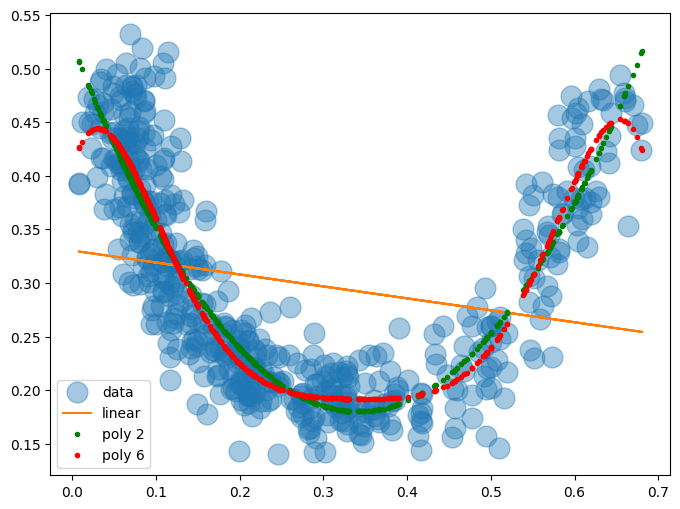

In [45]:
degree = 6

x = data['x'] / 1000
y = data['y'] / 1000

X_1 = poly_features(x, 1)
X_2 = poly_features(x, 2)
X_poly = poly_features(x, degree)

model_1 = sm.OLS(y, X_1)
model_2 = sm.OLS(y, X_2)
model_poly = sm.OLS(y, X_poly)

results_1 = model_1.fit()
results_2 = model_2.fit()
results_poly = model_poly.fit()

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, "o", ms=15, alpha=0.4, label="data")
ax.plot(x, results_1.fittedvalues, label='linear')
ax.plot(x, results_2.fittedvalues, "g.", label=f"poly 2")
ax.plot(x, results_poly.fittedvalues, "r.", label=f"poly {degree}")
ax.legend(loc="best")

print(f'Log-Likelihood\n linear: {results_1.llf}')
print(f' degree 2: {results_2.llf}')
print(f' degree {degree}: {results_poly.llf}')

print(f'AIC\n linear: {results_1.aic}')
print(f' degree 2: {results_2.aic}')
print(f' degree {degree}: {results_poly.aic}')

print(f'BIC\n linear: {results_1.bic}')
print(f' degree 2: {results_2.bic}')
print(f' degree {degree}: {results_poly.bic}')

In [43]:
degree_range = range(1, 100)
llf, aic, bic = [], [], []

for degree in degree_range:
    X_poly = poly_features(x, degree)
    model_poly = sm.OLS(y, X_poly)
    results_poly = model_poly.fit()

    llf.append(results_poly.llf)
    aic.append(results_poly.aic)
    bic.append(results_poly.bic)

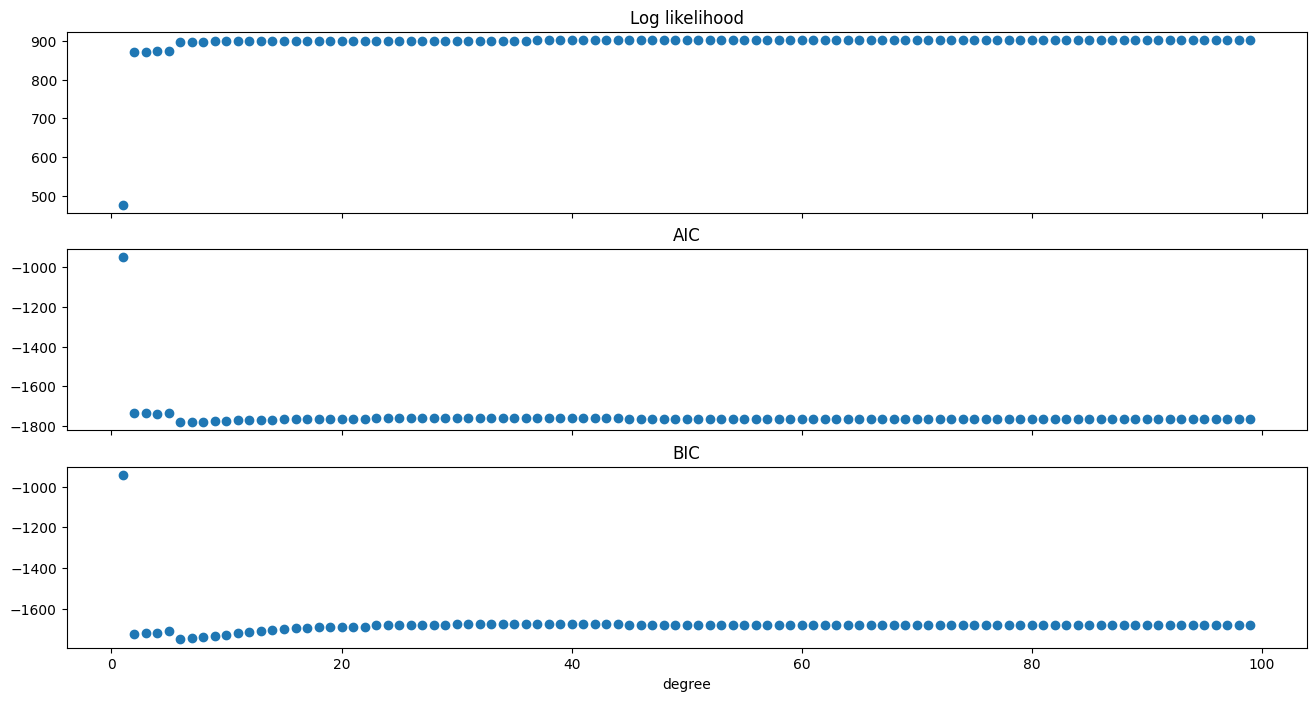

In [44]:
plt.subplots(nrows=3, ncols=1, figsize=(16, 8), sharex=True)
style = 'o'

plt.subplot(311)
plt.plot(degree_range, llf, style)
plt.title('Log likelihood')

plt.subplot(312)
plt.plot(degree_range, aic, style)
plt.title('AIC')

plt.subplot(313)
plt.plot(degree_range, bic, style)
plt.title('BIC')
plt.xlabel('degree');

According to the plots, degree = 6 looks like the most optimal choice because the metrics significantly improve at this value. However, having plotted the fitted values, I see that it is already overfit. Hence, I think 2 is the best degree because it is a local optimum in all plots and it does not look overfitted.

In [48]:
results_2.params

const    0.521587
x1      -1.998096
x2       2.922998
dtype: float64

Preprocessing for polynomial features:\
https://ostwalprasad.github.io/machine-learning/Polynomial-Regression-using-statsmodel.html

OLS and statmodels:
- https://www.statsmodels.org/stable/gettingstarted.html#design-matrices-endog-exog
- https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html#OLS-non-linear-curve-but-linear-in-parameters
- https://en.wikipedia.org/wiki/Ordinary_least_squares#Maximum_likelihood

For more complicated models:
- statsmodel library: In Python, a statistical library, statsmodels.formula.api provides a direct approach to compute MLE (and AIC/BIC)\
https://www.statsmodels.org/dev/examples/notebooks/generated/generic_mle.html?highlight=likelihood
- Expectation–maximization algorithm
https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm

